In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score

In [2]:
df=pd.read_csv("weather1.csv")
print(df.shape)
print(*df.columns,sep=" | ")

(145460, 23)
Date | Location | MinTemp | MaxTemp | Rainfall | Evaporation | Sunshine | WindGustDir | WindGustSpeed | WindDir9am | WindDir3pm | WindSpeed9am | WindSpeed3pm | Humidity9am | Humidity3pm | Pressure9am | Pressure3pm | Cloud9am | Cloud3pm | Temp9am | Temp3pm | RainToday | RainTomorrow


In [3]:
df.sample(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
114318,2016-08-28,Witchcliffe,9.2,12.6,13.2,NaN,NaN,S,54.0,S,...,91.0,93.0,1012.0,1012.3,NaN,NaN,10.1,12.1,Yes,Yes
92948,2016-07-29,GoldCoast,11.0,23.6,NaN,NaN,NaN,NaN,NaN,NW,...,68.0,34.0,1023.5,1019.1,NaN,NaN,16.8,22.9,NaN,No


In [4]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
df=df.dropna()
print(df.shape)

(56420, 23)


Checking the unique values of every columns -

In [6]:
for col in df:
    print(col," | Total Unique Values = ",len(df[col].unique())," | All Values: ")
    if(col!="Date"):
        for item in df[col].unique():
            print(item,end=" ")
    else:
        print("Date value is skipped !")
    print("\n\n")

Date  | Total Unique Values =  3416  | All Values: 
Date value is skipped !



Location  | Total Unique Values =  26  | All Values: 
Cobar CoffsHarbour Moree NorfolkIsland Sydney SydneyAirport WaggaWagga Williamtown Canberra Sale MelbourneAirport Melbourne Mildura Portland Watsonia Brisbane Cairns Townsville MountGambier Nuriootpa Woomera PerthAirport Perth Hobart AliceSprings Darwin 


MinTemp  | Total Unique Values =  348  | All Values: 
17.9 18.4 19.4 21.9 24.2 27.1 23.3 16.1 19.0 19.7 20.9 23.9 24.9 25.2 21.6 21.4 25.4 21.8 20.3 22.1 23.8 27.0 26.2 25.0 25.1 24.8 27.6 23.6 24.1 27.2 29.1 28.9 19.3 14.1 14.5 16.8 16.0 17.4 15.9 16.5 20.4 19.9 17.2 21.0 18.7 22.2 16.9 20.0 23.0 18.6 11.9 13.1 21.1 19.5 18.5 9.2 12.1 13.9 15.3 17.6 19.1 21.3 19.2 23.5 20.8 16.6 17.3 18.0 15.6 9.9 10.7 9.4 13.5 17.1 16.2 14.9 11.7 11.2 11.4 13.3 12.3 12.0 16.7 12.7 5.7 12.4 6.2 6.6 7.5 8.5 9.7 5.9 7.9 7.7 10.4 9.0 5.4 8.8 7.8 12.8 12.5 10.9 12.6 13.2 13.0 7.2 2.4 6.8 11.3 11.1 11.6 6.9 6.5 5.5 0.2 1.9 

20.0 30.0 42.0 37.0 19.0 26.0 33.0 25.0 46.0 61.0 27.0 40.0 24.0 34.0 54.0 71.0 89.0 50.0 45.0 31.0 35.0 32.0 22.0 23.0 38.0 44.0 66.0 81.0 65.0 94.0 69.0 39.0 52.0 53.0 60.0 55.0 41.0 28.0 29.0 49.0 86.0 47.0 43.0 58.0 67.0 51.0 57.0 97.0 92.0 56.0 64.0 78.0 96.0 68.0 87.0 74.0 82.0 76.0 95.0 72.0 79.0 84.0 73.0 91.0 83.0 48.0 90.0 59.0 85.0 77.0 98.0 80.0 75.0 99.0 36.0 18.0 17.0 21.0 15.0 9.0 12.0 13.0 16.0 70.0 6.0 10.0 14.0 93.0 11.0 62.0 63.0 88.0 100.0 8.0 7.0 3.0 2.0 5.0 4.0 0.0 1.0 


Humidity3pm  | Total Unique Values =  101  | All Values: 
13.0 8.0 22.0 15.0 19.0 9.0 28.0 14.0 5.0 29.0 52.0 63.0 50.0 23.0 10.0 16.0 17.0 18.0 20.0 21.0 12.0 25.0 53.0 93.0 56.0 97.0 77.0 30.0 34.0 32.0 31.0 35.0 43.0 24.0 36.0 40.0 26.0 76.0 68.0 71.0 27.0 33.0 37.0 41.0 46.0 91.0 49.0 44.0 45.0 95.0 92.0 70.0 55.0 57.0 60.0 39.0 42.0 47.0 51.0 38.0 94.0 62.0 90.0 74.0 48.0 6.0 7.0 1.0 73.0 11.0 79.0 65.0 4.0 84.0 54.0 86.0 2.0 87.0 88.0 66.0 96.0 69.0 81.0 75.0 58.0 59.0 98.0 67.0 61.0 72.0 8

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Removed the unnecessary columns -

In [8]:
df = df.drop(["RainToday","RainTomorrow",],axis = 1)

Fetched the Day Month Year and make them as separate columns -

In [9]:
df['Date'] = pd.to_datetime(df.Date)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df= df.drop('Date' ,axis = 1)

Changed the string distinct values as number by using LabelEncode -

In [10]:
label = LabelEncoder()
df['Location'] = label.fit_transform(df['Location'].astype('str'))
df['WindGustDir'] = label.fit_transform(df['WindGustDir'].astype('str'))
df['WindDir9am'] = label.fit_transform(df['WindDir9am'].astype('str'))
df['WindDir3pm'] = label.fit_transform(df['WindDir3pm'].astype('str'))

df.sample(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
67555,8,10.8,16.1,0.0,1.2,0.0,3,41.0,3,5,...,75.0,1019.3,1018.0,7.0,7.0,11.0,15.5,2009,6,21
86942,1,16.8,29.2,0.0,16.0,10.7,2,33.0,6,0,...,59.0,1010.2,1009.9,1.0,3.0,25.3,24.1,2016,10,11
9766,5,21.6,33.2,0.0,7.2,8.2,3,50.0,7,4,...,64.0,1009.3,1006.0,6.0,7.0,27.0,28.8,2010,12,10


In [11]:
X=df.drop("MaxTemp",axis=1)
y=df[["MaxTemp"]]
print(X.shape)
print(y.shape)

(56420, 22)
(56420, 1)


### Splitted the whole dataset into the Test and Train datasets

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=15)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("Coefficients : ",regressor.coef_)

Coefficients :  [[ 0.00345507 -0.05061206 -0.00943588  0.06615102  0.03205021  0.00766206
   0.01854926 -0.01500373  0.0104486  -0.01810826 -0.01147781 -0.01043818
   0.02140309 -0.04381839  0.03073401 -0.02206003  0.06206476  0.12539389
   0.92383951  0.00517096 -0.00155639  0.00142294]]


In [13]:
predicted = regressor.predict(X_test)

Text(0, 0.5, 'Predicted Values')

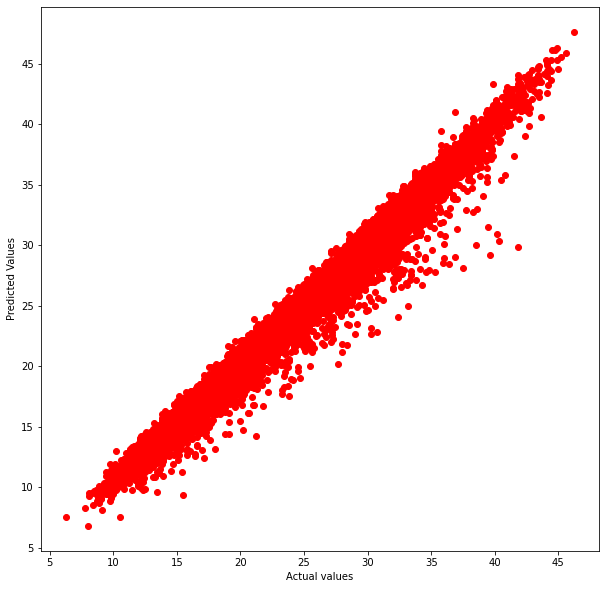

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predicted,c="red")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')

In [15]:
print("Accuracy of the model :",round(regressor.score(X_train, y_train),2))
print('R2 score :',round(r2_score(y_test,predicted),2))
print('Mean squared Error :',round(mean_squared_error(y_test,predicted),2))

Accuracy of the model : 0.98
R2 score : 0.98
Mean squared Error : 1.02
